In [1]:
import pandas as pd
import numpy as np
from attpc_engine import nuclear_map

In [19]:
df = pd.read_parquet("/Users/mahesh/Desktop/academics/spyral_eng/my_sim/output/kinematics/o16a4a_700Torr_161.6MeV_1exc.parquet")
df

,event,Z,A,isotope,energy,px,py,pz,vertex_x,vertex_y,vertex_z
0,0,2,4,4He,3727.379333,0.000000,0.000000,0.000000,0.003329,-0.001392,0.342240
1,0,8,16,16O,15041.121897,0.000000,0.000000,2090.913646,0.003329,-0.001392,0.342240
2,0,2,4,4He,3781.784107,106.411496,338.770724,531.455857,0.003329,-0.001392,0.342240
3,0,8,16,16O,14986.717123,-106.411496,-338.770724,1559.457789,0.003329,-0.001392,0.342240
4,1,2,4,4He,3727.379333,0.000000,0.000000,0.000000,0.000533,0.008207,0.073378
...,...,...,...,...,...,...,...,...,...,...,...
399995,99998,8,16,16O,15026.287550,284.592215,-154.108894,1908.111691,0.002252,0.001453,0.214505
399996,99999,2,4,4He,3727.379333,0.000000,0.000000,0.000000,-0.004710,0.002758,0.646546
399997,99999,8,16,16O,15026.085639,0.000000,0.000000,1979.853935,-0.004710,0.002758,0.646546
399998,99999,2,4,4He,3776.502293,-195.375135,263.643542,510.816519,-0.004710,0.002758,0.646546


In [20]:
filtered_df = df[(df["isotope"] == "4He") & (df["px"] != 0.0)] 
filtered_df

,event,Z,A,isotope,energy,px,py,pz,vertex_x,vertex_y,vertex_z
2,0,2,4,4He,3781.784107,106.411496,338.770724,531.455857,0.003329,-0.001392,0.342240
6,1,2,4,4He,3763.505523,-272.917766,267.579075,352.894412,0.000533,0.008207,0.073378
10,2,2,4,4He,3797.924978,113.759452,-189.248083,694.349624,0.000615,0.003975,0.498255
14,3,2,4,4He,3778.783540,-229.402226,-120.308371,564.578485,-0.002826,-0.007635,0.917170
18,4,2,4,4He,3765.611241,-311.425218,105.060788,422.430932,-0.008563,-0.004752,0.817619
...,...,...,...,...,...,...,...,...,...,...,...
399982,99995,2,4,4He,3756.784076,-352.799637,68.251362,301.569343,-0.010419,-0.005920,0.226898
399986,99996,2,4,4He,3785.970077,18.412075,371.072693,549.707909,-0.001335,-0.011496,0.113209
399990,99997,2,4,4He,3811.387750,-74.938602,-178.029826,772.016501,-0.000092,0.000072,0.130436
399994,99998,2,4,4He,3748.181095,-284.592215,154.108894,225.305459,0.002252,0.001453,0.214505


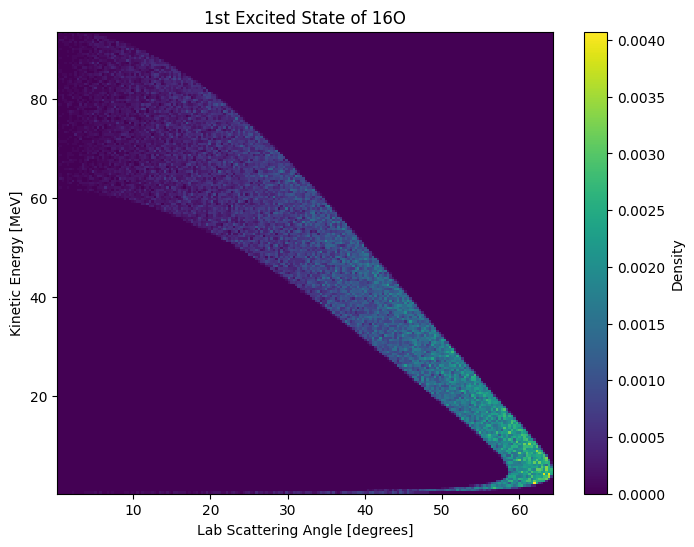

In [21]:
import matplotlib.pyplot as plt

ke = filtered_df["energy"] - nuclear_map.get_data(2, 4).mass
p = np.sqrt(filtered_df["px"]**2 + filtered_df["py"]**2 + filtered_df["pz"]**2)
polar =  np.degrees(np.acos(filtered_df["pz"]/p))

x = polar
y = ke

xbins = 200
ybins = 200

plt.figure(figsize=(8, 6))
hist, xedges, yedges, img = plt.hist2d(x, y, bins=[xbins, ybins], density=True)

cbar = plt.colorbar()
cbar.set_label("Density")

plt.xlabel("Lab Scattering Angle [degrees]")
plt.ylabel("Kinetic Energy [MeV]")
plt.title("1st Excited State of 16O")


plt.show()


In [ ]:
from vpython import * 

max_eventnum = df["event"].max()
print(f"Max event number: {max_eventnum}")

scatalpha_arr = np.full((max_eventnum,3),np.nan)

for i in range(0,max_eventnum):
    scatalpha_arr[i,0] = i
    filter_event = filtered_df[filtered_df["event"] == i]
    alpha_idx = 1
    scatalpha_arr[i,1] = filter_event.iloc[alpha_idx]["energy"] - nuclear_map.get_data(2, 4).mass #kinetic enegry 
    p = vector(filter_event.iloc[alpha_idx]["px"],filter_event.iloc[alpha_idx]["py"],filter_event.iloc[alpha_idx]["pz"])
    polar = degrees(acos(p.z/p.mag))
    scatalpha_arr[i,2] = polar #scattering angle


Max event number: 99999


In [37]:
print(scatalpha_arr)

[[0.00000000e+00 2.91666476e+01 3.92874009e+01]
 [1.00000000e+00 6.08098254e+00 3.98086317e+01]
 [2.00000000e+00 5.64847268e+01 1.64536199e+01]
 ...
 [9.99960000e+04 4.32041361e+01 3.11025335e+01]
 [9.99970000e+04 4.93578352e+01 2.81097343e+01]
 [9.99980000e+04 1.39627372e+01 4.21356619e+01]]


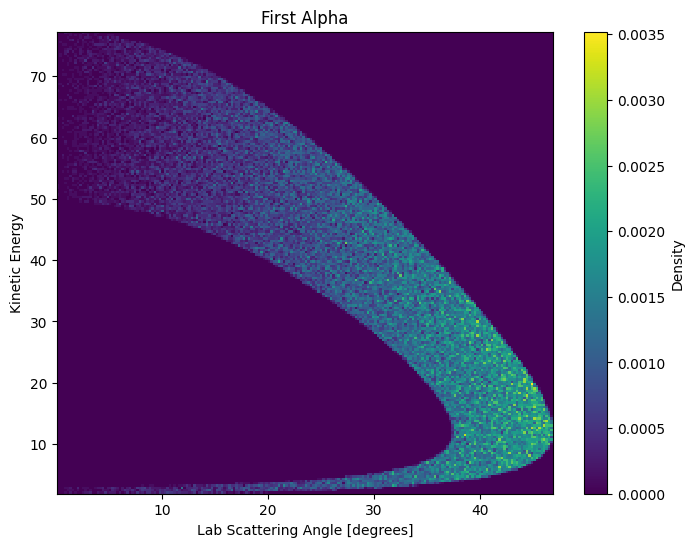

In [38]:
import matplotlib.pyplot as plt

x = scatalpha_arr[:, 2]
y = scatalpha_arr[:, 1]

xbins = 200
ybins = 200

plt.figure(figsize=(8, 6))
hist, xedges, yedges, img = plt.hist2d(x, y, bins=[xbins, ybins], density=True)

cbar = plt.colorbar()
cbar.set_label("Density")

plt.xlabel("Lab Scattering Angle [degrees]")
plt.ylabel("Kinetic Energy")
plt.title("First Alpha")


plt.show()
